In [1]:
## import python libraries
# !pip install mysql-connector-python
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mysql.connector


In [4]:
# Create the connection object
conn = mysql.connector.connect(host="localhost", user="root", passwd="", database="testing_db")
cursor = conn.cursor()

# SQL query to fetch data
query = "SELECT * FROM diwali_sales_data"

# Execute the query
cursor.execute(query)

# Fetch all the rows from the result
result = cursor.fetchall()

# Get the column names from the cursor description
columns = [column[0] for column in cursor.description]

# Create a DataFrame from the fetched rows and column names
df = pd.DataFrame(result, columns=columns)

# Close the cursor and connection
cursor.close()
conn.close()


In [5]:
df.shape
df['Orders'] = pd.to_numeric(df['Orders'], errors='coerce')

In [15]:
df.head(15)

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,100000883,Smith,P00081142,F,18-25,22,1,Haryana,Northern,Textile,Clothing & Apparel,4,3704.0,,
1,100027525,Ed,P00036842,F,18-25,24,0,Karnataka,Southern,Retail,Games & Toys,3,12796.0,,
2,100047896,Ginny,P00050542,F,26-35,27,0,Maharashtra,Western,Lawyer,Food,4,19670.0,,
3,100288229,Dhanraj,P00241642,M,0-17,16,0,Delhi,Central,Food Processing,Electronics & Gadgets,2,4174.0,,
4,100306491,Bergmann,P00154242,F,36-45,45,0,Maharashtra,Western,Lawyer,Food,2,15840.0,,
5,100358246,Namrata,P00233442,F,36-45,41,0,Himachal Pradesh,Northern,Retail,Sports Products,2,11011.0,,
6,100812562,Kipp,P00028842,F,26-35,31,0,Maharashtra,Western,Media,Food,4,11642.0,,
7,100895860,Manshul,P00023142,F,26-35,30,1,Himachal Pradesh,Northern,Automobile,Electronics & Gadgets,4,7914.0,,
8,101013708,Shourya,P00227342,F,26-35,30,0,Maharashtra,Western,Lawyer,Clothing & Apparel,4,1861.0,,
9,101220895,Karandeep,P00282642,M,26-35,34,0,Delhi,Central,IT Sector,Clothing & Apparel,3,1720.0,,


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11250 non-null  int64 
 1   Cust_name         11250 non-null  object
 2   Product_ID        11250 non-null  object
 3   Gender            11250 non-null  object
 4   Age_Group         11250 non-null  object
 5   Age               11250 non-null  object
 6   Marital_Status    11250 non-null  object
 7   State             11250 non-null  object
 8   Zone              11250 non-null  object
 9   Occupation        11250 non-null  object
 10  Product_Category  11250 non-null  object
 11  Orders            11250 non-null  object
 12  Amount            11250 non-null  object
 13  Status            11250 non-null  object
 14  unnamed1          11250 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.3+ MB


In [12]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age_Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
#rename coloum
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,100000883,Smith,P00081142,F,18-25,22,1,Haryana,Northern,Textile,Clothing & Apparel,4,3704.0
1,100027525,Ed,P00036842,F,18-25,24,0,Karnataka,Southern,Retail,Games & Toys,3,12796.0
2,100047896,Ginny,P00050542,F,26-35,27,0,Maharashtra,Western,Lawyer,Food,4,19670.0
3,100288229,Dhanraj,P00241642,M,0-17,16,0,Delhi,Central,Food Processing,Electronics & Gadgets,2,4174.0
4,100306491,Bergmann,P00154242,F,36-45,45,0,Maharashtra,Western,Lawyer,Food,2,15840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,999588907,Craven,P00183342,F,18-25,22,1,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,1,16788.0
11246,999639250,Kalyani,P00293242,M,51-55,55,0,Karnataka,Southern,Food Processing,Electronics & Gadgets,2,5911.0
11247,999693348,Akancha,P00148042,F,18-25,23,1,Delhi,Central,IT Sector,Household items,4,3025.0
11248,999888153,Keshav,P00192542,M,18-25,19,1,Uttar Pradesh,Central,Govt,Footwear & Shoes,3,16760.0


In [18]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID
count,1.125000e+04
mean,5.541261e+08
std,2.587368e+08
min,1.000009e+08
25%,3.317512e+08
50%,5.535834e+08
75%,7.808275e+08
max,9.999025e+08


In [19]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11250,11250,11250
unique,81,4,6584
top,30,2,
freq,522,2895,12


# Exploratory Data Analysis

### Gender

In [ ]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

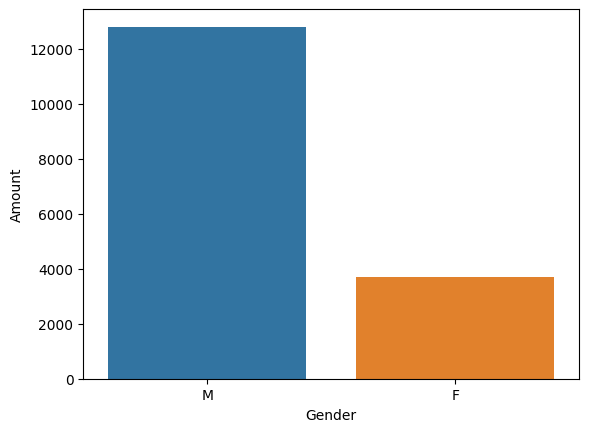

In [28]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y=pd.to_numeric(df['Amount']), data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

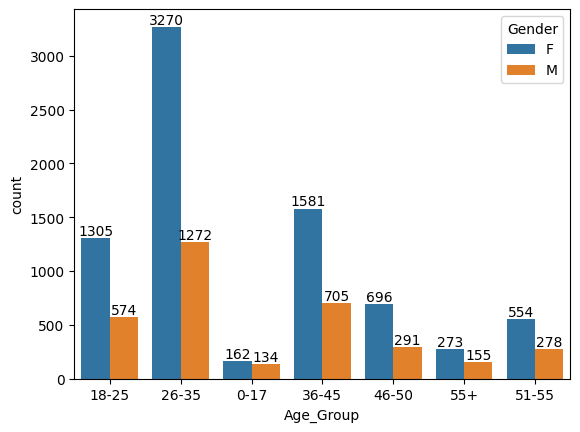

In [30]:
ax = sns.countplot(data = df, x = 'Age_Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

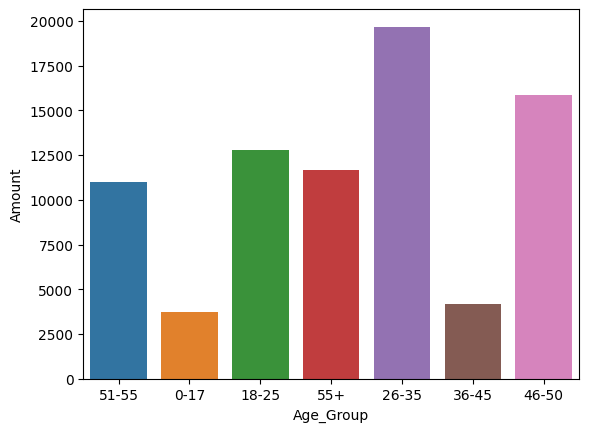

In [35]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age_Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age_Group',y= pd.to_numeric(df['Amount']) ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

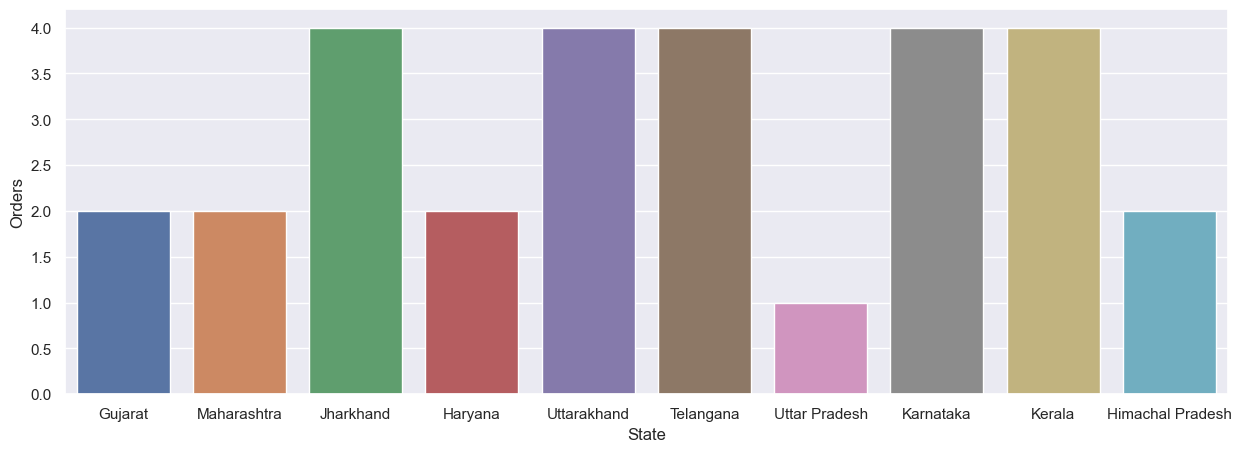

In [37]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= pd.to_numeric(df['Orders']))

<Axes: xlabel='State', ylabel='Amount'>

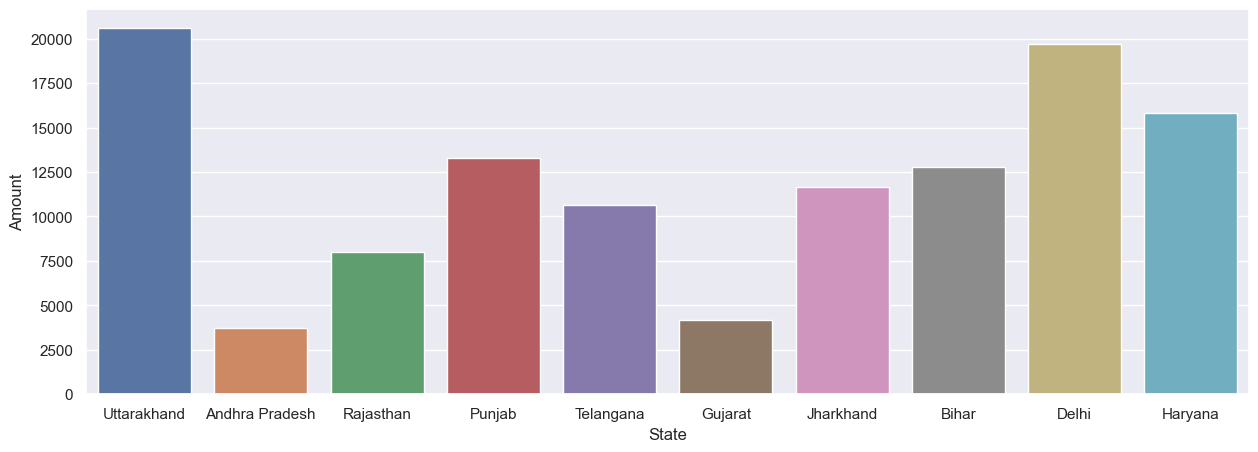

In [38]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= pd.to_numeric(df['Amount']))

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital Status

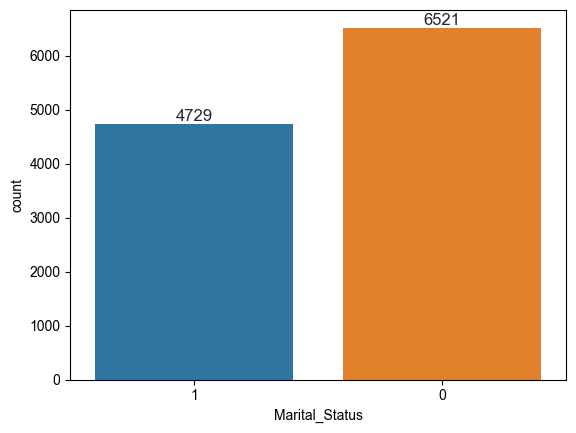

In [8]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(3,4)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

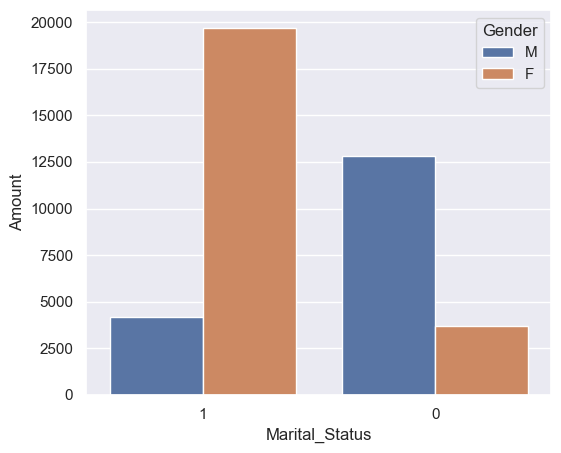

In [39]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= pd.to_numeric(df['Amount']), hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= pd.to_numeric(df['Amount']))

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

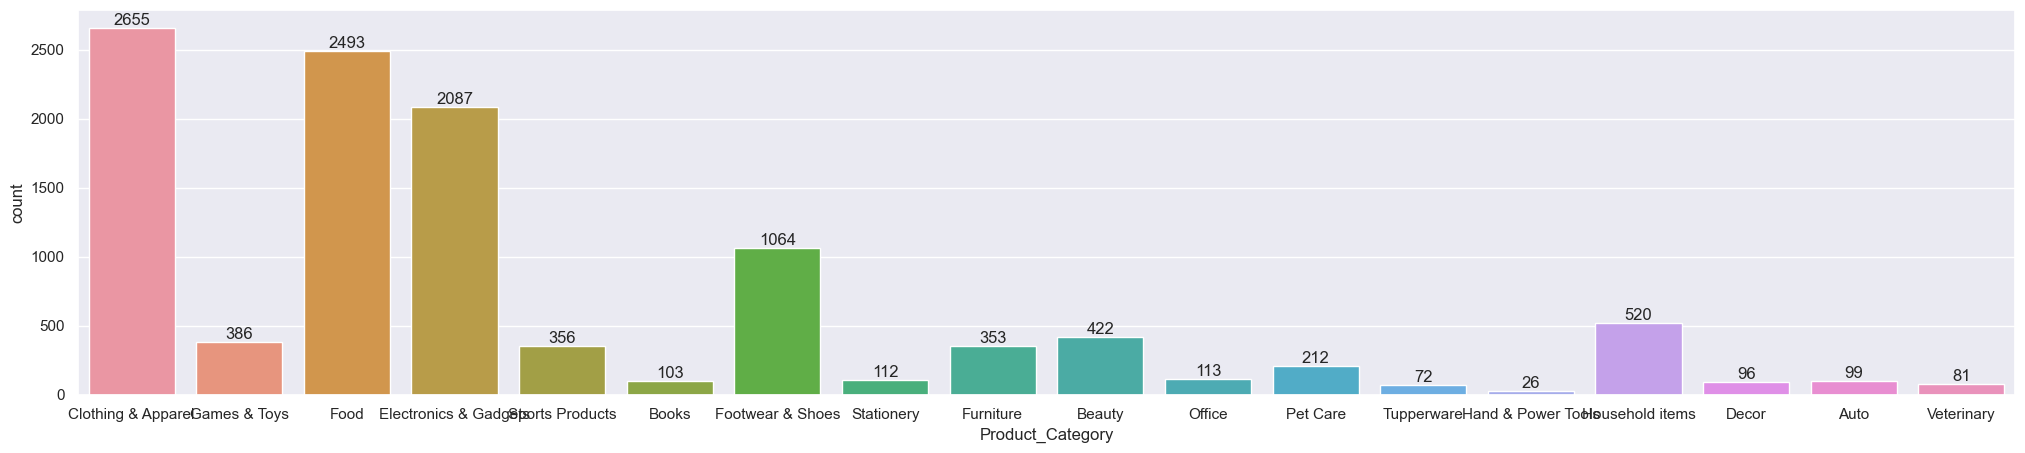

In [10]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

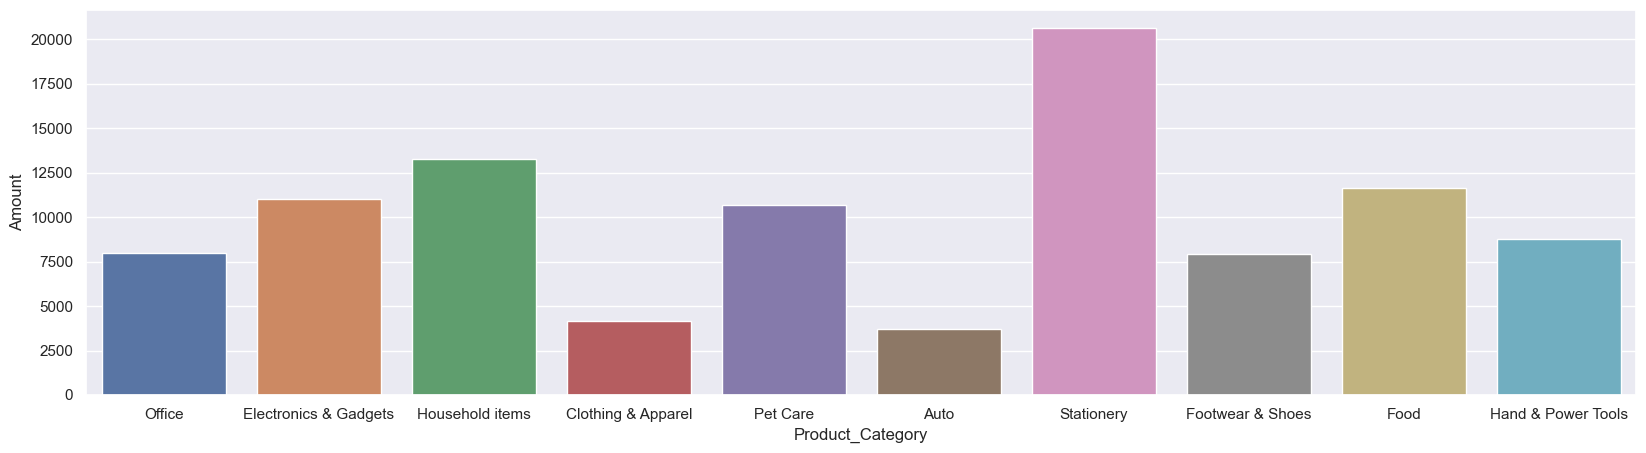

In [11]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= pd.to_numeric(df['Amount']))

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

### Product

<Axes: xlabel='Product_ID', ylabel='Orders'>

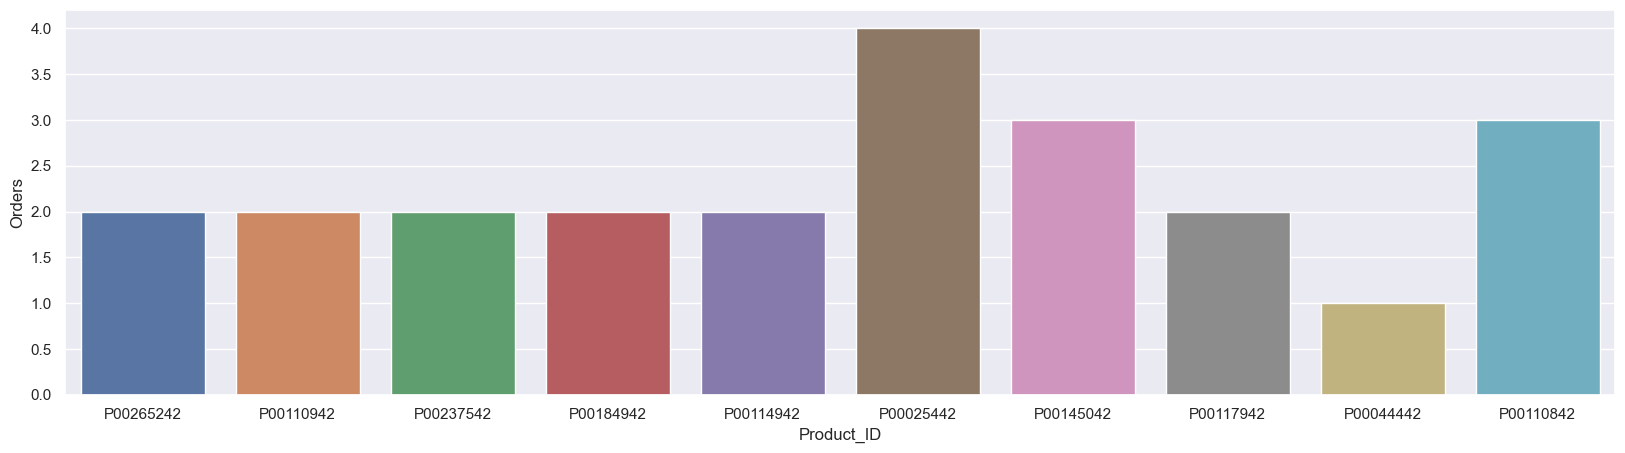

In [12]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_ID', y=pd.to_numeric(df['Orders']))

<Axes: xlabel='Product_ID'>

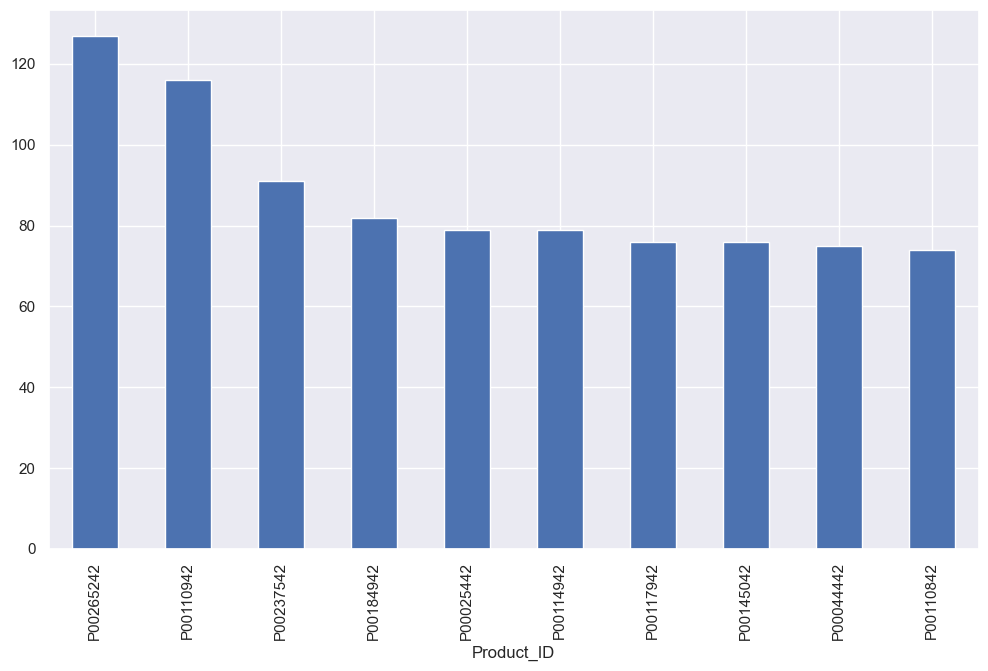

In [14]:
# top 10 most sold products (same thing as above)
# df['Orders'] = pd.to_numeric(df['Orders'], errors='coerce')
df.dropna(subset=['Orders'], inplace=True)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*